# Intro to NLP with spaCy

This notebook is a hands-on introduction to NLP with [spaCy](https://spacy.io/), a library by [explosion.ai](https://explosion.ai/). 

> spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python.

spaCy helps you
- work with a lot of text _(corpus)_
- preprocess text
- extract information, like
    - what is the corpus about? 
    - which texts are similar to each other?
    - which people, companies, countries etc. are mentioned? 
    - who says what to whom?

spaCy handles many tasks commonly associated with building an end-to-end natural language processing pipeline:
- tokenization and sentence boundary detection
- normalization (lowercasing, stemming/lemmatization...)
- POS tagging
- dependency parsing
- NER

Why spaCy?
- batteries included (stopwords, token probabilities, word vectors)
- scaling from prototyping to deployment
- visualization

spaCy (out of the box) is not for:
- downstream tasks (topic modeling, classification, chatbots, ...)
- niche preprocessing tasks (coreference resolution, ...)
- ...
- but!



In [11]:
!pip3 uninstall -y murmurhash

Found existing installation: murmurhash 0.26.4
Uninstalling murmurhash-0.26.4:
  Successfully uninstalled murmurhash-0.26.4


In [13]:
!pip3 install spacy

  Using cached spacy-2.3.2.tar.gz (5.9 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... error
    ERROR: Command errored out with exit status 1:
     command: /ssd/samory/spacytutorial/env/bin/python3 /ssd/samory/spacytutorial/env/local/lib/python3.5/site-packages/pip/_vendor/pep517/_in_process.py prepare_metadata_for_build_wheel /tmp/tmpmubmno_6
         cwd: /tmp/pip-install-jp453sjl/spacy
    Complete output (28 lines):
    Traceback (most recent call last):
      File "/ssd/samory/spacytutorial/env/local/lib/python3.5/site-packages/pip/_vendor/pep517/_in_process.py", line 280, in <module>
        main()
      File "/ssd/samory/spacytutorial/env/local/lib/python3.5/site-packages/pip/_vendor/pep517/_in_process.py", line 263, in main
        json_out['return_val'] = hook(**hook_input['kwargs'])
      File "/ssd/samory/spacytutorial/env/local/lib/python3.5/site-packages/pip/_vendor/pep517/_in_process.py", line 

In [9]:
!python3 -m spacy download en_core_web_sm

/ssd/samory/spacytutorial/env/bin/python3: No module named spacy


In [10]:
!python3 -m spacy download en_core_web_md

/ssd/samory/spacytutorial/env/bin/python3: No module named spacy


In [4]:
import en_core_web_md
nlp = en_core_web_md.load()

ImportError: cannot import name 'load_model_from_init_py'

In [5]:
import spacy
nlp = spacy.load('en_core_web_sm')

RuntimeError: Language not supported: en_core_web_sm

In [9]:
# !pip install matplotlib pandas bs4

In [10]:
import spacy
from spacy import displacy
import pandas as pd
import re
from bs4 import BeautifulSoup
from collections import Counter
from itertools import islice
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
doc = "Why does Donald Trump always wear black suits? Because he is mourning for his brain."
doc

'Why does Donald Trump always wear black suits? Because he is mourning for his brain.'

In [12]:
spacy_doc = nlp(doc)
spacy_doc

Why does Donald Trump always wear black suits? Because he is mourning for his brain.

In [13]:
for token in spacy_doc:
    print(token)

Why
does
Donald
Trump
always
wear
black
suits
?
Because
he
is
mourning
for
his
brain
.


In [14]:
for sentence in spacy_doc.sents:
    print(sentence)

Why does Donald Trump always wear black suits?
Because he is mourning for his brain.


In [15]:
spacy_doc.ents

(Donald Trump,)

## How spaCy represents text (data structures)

In [16]:
print(spacy_doc, type(spacy_doc), )
print(spacy_doc[:], type(spacy_doc[:]),)
print(spacy_doc[0], type(spacy_doc[0]), )


Why does Donald Trump always wear black suits? Because he is mourning for his brain. <class 'spacy.tokens.doc.Doc'>
Why does Donald Trump always wear black suits? Because he is mourning for his brain. <class 'spacy.tokens.span.Span'>
Why <class 'spacy.tokens.token.Token'>


In [17]:
type(list(spacy_doc.sents)[0])

spacy.tokens.span.Span

In [18]:
displacy.render(list(spacy_doc.sents)[0], 
                style="dep", 
                options = {"compact": True, 
                           "bg": "#09a3d5",
                           "color": "white", })

In [19]:
displacy.render(list(spacy_doc.sents)[0], 
                style="ent", )

### Exploring tokens

In [20]:
token = spacy_doc[3]

In [21]:
dir(token)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 'ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_extension',
 'has_vector',
 'head',
 'i',
 'idx',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_end',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'left_edge',
 'lefts',
 'lemma',
 'lemma_',
 'lex_id',
 'like_email',
 'like_num

In [22]:
list(filter(lambda x: not x.startswith("_"),  dir(token)))

['ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_extension',
 'has_vector',
 'head',
 'i',
 'idx',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_end',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'left_edge',
 'lefts',
 'lemma',
 'lemma_',
 'lex_id',
 'like_email',
 'like_num',
 'like_url',
 'lower',
 'lower_',
 'morph',
 'n_lefts',
 'n_rights',
 'nbor',
 'norm',
 'norm_',
 'orth',
 'orth_',
 'pos',
 'pos_',
 'prefix',
 'prefix_',
 'prob',
 'rank',
 'remove_extension',
 'right_edge',
 'rights',
 'sent',
 'sent_start',
 'sentiment',
 'set_extension',
 'shape',
 'shape_',
 'similarity',
 'string',
 'subtree',
 'suffix',
 'suffix_',
 'tag',
 

if you get lost:

In [23]:
token.doc

Why does Donald Trump always wear black suits? Because he is mourning for his brain.

In [24]:
assert token == spacy_doc[token.i]

In [25]:
token.text

'Trump'

In [26]:
token.pos, token.pos_

(96, 'PROPN')

In [27]:
token.prob

-20.0

In [28]:
token.vector

array([-4.2175e-01,  1.8711e-01,  3.4765e-01, -2.8588e-01, -8.3932e-02,
        1.1277e-02,  2.1249e-02,  2.6343e-01,  2.2187e-01,  1.1753e+00,
       -9.2204e-02, -6.5978e-01,  1.4032e-01,  1.9669e-01,  5.0662e-02,
        1.1238e-01, -4.0031e-01, -3.4718e-01,  1.0501e-02,  1.9059e-01,
        4.7089e-02,  1.2648e-01,  1.2395e-01, -1.4647e-01,  4.9865e-01,
        9.0596e-02, -2.4599e-01, -8.2896e-02, -3.2482e-01, -1.5548e-03,
        1.3087e-01,  2.1520e-01,  1.9742e-01,  1.2051e-01,  4.5222e-01,
        4.4882e-01,  1.0680e-01,  1.3475e-02, -3.2072e-01,  6.2445e-02,
       -4.8712e-01, -1.6536e-01, -2.8725e-01,  6.0925e-01, -1.3591e-01,
        9.0801e-03, -2.9597e-01, -3.1342e-01,  1.7717e-02,  3.7069e-01,
        1.5938e-01,  5.0631e-01, -3.2633e-03, -3.1040e-01, -5.2806e-01,
        1.9271e-01,  8.9184e-02,  4.7455e-01,  4.1562e-02, -2.1373e-01,
       -3.6329e-01,  3.6512e-01,  9.2584e-02, -5.3587e-01,  2.7139e-01,
       -2.7306e-02, -6.8992e-02,  8.2103e-02,  2.1897e-02, -4.74

### Notable Spans

In [29]:
for entity in spacy_doc.ents:
    print("{} is an entity of type {}".format(entity, entity.label_))


Donald Trump is an entity of type PERSON


In [30]:
for noun_phrase in spacy_doc.noun_chunks:
    print(noun_phrase)

Donald Trump
black suits
he
his brain


## Extensions

In [1]:
# !pip3 uninstall -y neuralcoref
# !pip3 install neuralcoref --no-binary neuralcoref

Found existing installation: neuralcoref 4.0
Uninstalling neuralcoref-4.0:
  Successfully uninstalled neuralcoref-4.0


In [11]:
# !pip3 uninstall -y sense2vec

Found existing installation: sense2vec 0.6.0
Uninstalling sense2vec-0.6.0:
  Successfully uninstalled sense2vec-0.6.0


/ssd/samory/spacytutorial/env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: spacy.morphology.Morphology size changed, may indicate binary incompatibility. Expected 104 from C header, got 112 from PyObject
  return f(*args, **kwds)
/ssd/samory/spacytutorial/env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: spacy.vocab.Vocab size changed, may indicate binary incompatibility. Expected 96 from C header, got 112 from PyObject
  return f(*args, **kwds)
/ssd/samory/spacytutorial/env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: spacy.tokens.span.Span size changed, may indicate binary incompatibility. Expected 72 from C header, got 80 from PyObject
  return f(*args, **kwds)


In [ ]:
from spacy.pipeline import EntityRuler

ruler = EntityRuler(nlp)
patterns = [{"label": "ORG", "pattern": "Apple", "id": "apple"},
            {"label": "GPE", "pattern": [{"LOWER": "san"}, {"LOWER": "francisco"}], "id": "san-francisco"},
            {"label": "GPE", "pattern": [{"LOWER": "san"}, {"LOWER": "fran"}], "id": "san-francisco"}]
ruler.add_patterns(patterns)
nlp.add_pipe(ruler)

doc1 = nlp("Apple is opening its first big office in San Francisco.")
print([(ent.text, ent.label_, ent.ent_id_) for ent in doc1.ents])

doc2 = nlp("Apple is opening its first big office in San Fran.")
print([(ent.text, ent.label_, ent.ent_id_) for ent in doc2.ents])

## Example data exploration

some real data from https://osf.io/qhm5z/

> Clarke I, Grieve J (2019) Stylistic variation on the Donald Trump Twitter account: A linguistic analysis of tweets posted between 2009 and 2018. PLoS ONE 14(9): e0222062.  

[Link to the paper](https://doi.org/10.1371/journal.pone.0222062)

In [24]:
# !wget -O trump_tweets.txt https://osf.io/jw5ad/download

--2020-07-13 19:00:06--  https://osf.io/jw5ad/download
Resolving osf.io (osf.io)... 35.190.84.173
Connecting to osf.io (osf.io)|35.190.84.173|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://files.osf.io/v1/resources/qhm5z/providers/osfstorage/5d9104ffc43280001cc66d53?action=download&direct&version=1 [following]
--2020-07-13 19:00:07--  https://files.osf.io/v1/resources/qhm5z/providers/osfstorage/5d9104ffc43280001cc66d53?action=download&direct&version=1
Resolving files.osf.io (files.osf.io)... 35.186.214.196
Connecting to files.osf.io (files.osf.io)|35.186.214.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4622372 (4.4M) [application/octet-stream]
Saving to: ‘trump_tweets.txt’

trump_tweets.txt    100%[===================>]   4.41M  6.23MB/s    in 0.7s    

2020-07-13 19:00:09 (6.23 MB/s) - ‘trump_tweets.txt’ saved [4622372/4622372]



In [28]:
trump_tweets = pd.read_csv('trump_tweets.txt', sep='\t')
trump_tweets.head()

,STATUSID,DATE,TIME,SOURCE,Retweet,Favourite,TWEETS
0,· 965971586913374208,02-20-2018,15:29:07,Twitter for iPhone,19693,79159,1. ....cameras running. Another False Accu...
1,· 965968309358333952,02-20-2018,15:16:06,Twitter for iPhone,21676,96352,"2. A woman I don’t know and, to the best o..."
2,· 965943827931549696,02-20-2018,13:38:49,Twitter for iPhone,16216,77951,3. I have been much tougher on Russia than...
3,· 965937068907073536,02-20-2018,13:11:58,Twitter for iPhone,20211,79178,4. Hope Republicans in the Great State of ...
4,· 965935035328155649,02-20-2018,13:03:53,Twitter for iPhone,10176,51701,5. Matt Schlapp and CPAC are getting ready...


In [83]:
unescape_html = lambda x: BeautifulSoup(x).get_text().strip()

remove_urls = lambda x: re.sub("http(.+)?(\W|$)", ' ', x)

normalize_spaces = lambda x: re.sub("[\n\r\t ]+", ' ', x)

remove_leading_digits = lambda x: re.sub("\d+\.", "", x)

In [85]:
def preprocess(x):
    x = remove_leading_digits(x)
    x = unescape_html(x)
    x = remove_urls(x)
    x = normalize_spaces(x)
    
    return x.strip()

In [86]:
trump_tweets['text'] = trump_tweets.TWEETS.apply(preprocess)

In [89]:
trump_doc = nlp('\n'.join(trump_tweets.head(2000).text.values))

what are the most common words?

In [90]:
Counter(map(lambda x:x.lemma_.lower(), 
            filter(lambda x: not (x.is_stop or x.is_punct or x.is_space),
                trump_doc))).most_common(10)

[('great', 481),
 ('people', 188),
 ('big', 181),
 ('news', 176),
 ('thank', 163),
 ('america', 162),
 ('fake', 156),
 ('tax', 151),
 ('country', 144),
 ('year', 142)]

In [91]:
set([w.label_ for w in trump_doc.ents])

{'CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART'}

In [92]:
set([ent.text.lower() for ent in trump_doc.ents if ent.label_ == 'GPE'])

{'@geraldorivera',
 '@secretaryperry',
 '@usembassyfrance',
 'afghanistan',
 'alabama',
 'alaska',
 'alexandria',
 'america',
 'aramco',
 'argentina',
 'arizona',
 'arlington',
 'atlanta',
 'australia',
 'az',
 'bahrain',
 'barcelona',
 'bedminster',
 'beijing',
 'beirut',
 'belgium',
 'boston',
 'broward county',
 'brussels',
 'building military',
 'california',
 'canada',
 'charlottesville',
 'chicago',
 'china',
 'cincinnati',
 'colombia',
 'connecticut',
 'crimea',
 'd.c.',
 'da nang',
 'dallas',
 'davos',
 'dem c.m.',
 'douglas county @dcsheriff',
 'dupont',
 'egypt',
 'europes',
 'fl',
 'florida',
 'forbidden city',
 'fort myer',
 'france',
 'georgia',
 'germany',
 'greece',
 'haiti',
 'hamburg',
 'hanoi',
 'harrisburg',
 'hawaii',
 'hollywood',
 'houston',
 'huntington',
 'huntsville',
 'india',
 'indiana',
 'indianapolis',
 'iowa',
 'iran',
 'iraq',
 'israel',
 'italy',
 'jamaica',
 'japan',
 'jefferson',
 'jerusalem',
 'kabul',
 'kansas',
 'kazakhstan',
 'kentucky',
 'korea',


In [94]:
GPE_counts = Counter(ent.lemma_.lower() for ent in trump_doc.ents if ent.label_ == 'GPE')

In [95]:
GPE_counts.most_common(10)

[('america', 127),
 ('u.s.', 79),
 ('russia', 53),
 ('china', 49),
 ('north korea', 47),
 ('the united states', 31),
 ('puerto rico', 27),
 ('florida', 26),
 ('alabama', 25),
 ('usa', 21)]

In [96]:
# shithole countries
GPE_counts.most_common()[::-1][:10]

[('montgomery', 1),
 ('alexandria', 1),
 ('@usembassyfrance', 1),
 ('sanctuary', 1),
 ('the great state of alaska', 1),
 ('fort myer', 1),
 ('norfolk', 1),
 ('l.a.', 1),
 ('skorea', 1),
 ('forbid city', 1)]

In [97]:
ORG_counts = Counter(ent.lemma_.lower() for ent in trump_doc.ents if ent.label_ == 'ORG')

In [98]:
ORG_counts.most_common(10)

[('🇸', 77),
 ('fbi', 49),
 ('obamacare', 48),
 ('senate', 43),
 ('congress', 38),
 ('trump', 35),
 ('fake news', 31),
 ('the fake news', 26),
 ('healthcare', 25),
 ('nfl', 23)]

In [100]:
def sentences_w_entity_regex(trump_doc, pattern):
    for entity in trump_doc.ents:
        if re.match(pattern, entity.string):
            yield entity.sent

In [101]:
for sentence in islice(sentences_w_entity_regex(trump_doc, re.compile("obama", re.I)), 10):
    print(sentence.text.strip())

I have been much tougher on Russia than Obama, just look at the facts.
Big difference from those days when President Obama held the White House.
The President Obama quote just before election.
Obama was President up to, and beyond, the 2016 Election.
Now that Adam Schiff is starting to blame President Obama for Russian meddling in the election, he is probably doing so as yet another excuse that the Democrats, lead by their fearless leader, Crooked Hillary Clinton, lost the 2016 election.
Obama was President, knew of the threat, and did nothing.
Never gotten over the fact that Obama was able to send $7 Billion Dollars in CASH to Iran and nobody in Congress, the FBI or Justice called for an investigation!
“President Trump reversed the policies of President Obama, and reversed our economic decline.”
While the Fake News loves to talk about my so-called low approval rating, @foxandfriends just showed that my rating on Dec. 28, 2017, was approximately the same as President Obama on Dec. 28, 

In [102]:
for sentence in islice(sentences_w_entity_regex(trump_doc, re.compile("crooked", re.I)), 10):
    print(sentence.text.strip())

That’s because he thought Crooked Hillary was going to win
Now that Adam Schiff is starting to blame President Obama for Russian meddling in the election, he is probably doing so as yet another excuse that the Democrats, lead by their fearless leader, Crooked Hillary Clinton, lost the 2016 election.
General McMaster forgot to say that the results of the 2016 election were not impacted or changed by the Russians and that the only Collusion was between Russia and Crooked H, the DNC and the Dems.
All tied into Crooked Hillary.
Many people in our Country are asking what the “Justice” Department is going to do about the fact that totally Crooked Hillary, AFTER receiving a subpoena from the United States Congress, deleted and “acid washed” 33,000 Emails?
So General Flynn lies to the FBI and his life is destroyed, while Crooked Hillary Clinton, on that now famous FBI holiday “interrogation” with no swearing in and no recording, lies many times...and nothing happens to her?
“Had the informatio

In [215]:
def locations(needle, haystack): 
    return pd.Series(np.histogram(
        [word.i for word in haystack 
         if needle == word.text.lower().strip()], bins=50)[0])

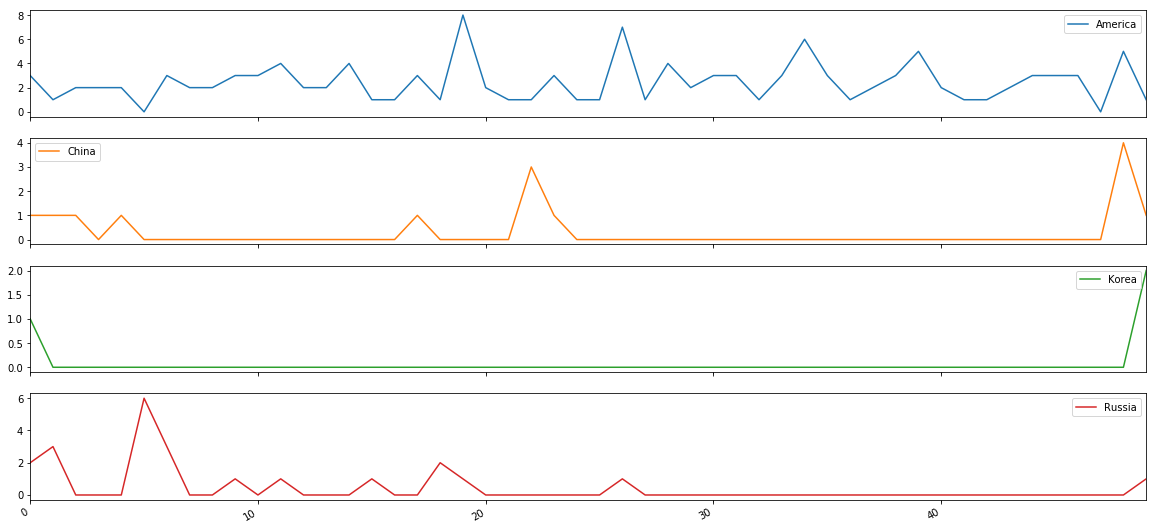

In [216]:
_ = pd.DataFrame(
    {name: locations(name.lower(), trump_doc) 
     for name in ['China', 'Russia', 'America', 'Korea']}
).plot(subplots=True, figsize=(20, 10))

In [217]:
trump_tweets.SOURCE.unique()

array(['Twitter for iPhone', 'Twitter for iPad', 'Media Studio',
       'Twitter Web Client', 'Twitter Ads', 'Twitter for Android',
       'Periscope', 'TweetDeck', 'Instagram', 'Twitter Mirror for iPad',
       'Twitter QandA', 'Facebook', 'Twitter for BlackBerry',
       'Neatly For BlackBerry 10', 'Mobile Web (M5)',
       'Twitter for Websites', 'Twitlonger', 'Vine - Make a Scene',
       'TwitLonger Beta'], dtype=object)

In [218]:
# Make a quick-and-dirty lookup table of POS IDs, 
# since the default representation of a POS is numeric. 
tagDict = {w.pos: w.pos_ for w in iphone_tweets} 
tagDict

{84: 'ADJ',
 85: 'ADP',
 86: 'ADV',
 87: 'AUX',
 89: 'CCONJ',
 90: 'DET',
 91: 'INTJ',
 92: 'NOUN',
 93: 'NUM',
 94: 'PART',
 95: 'PRON',
 96: 'PROPN',
 97: 'PUNCT',
 98: 'SCONJ',
 99: 'SYM',
 100: 'VERB',
 101: 'X',
 103: 'SPACE'}

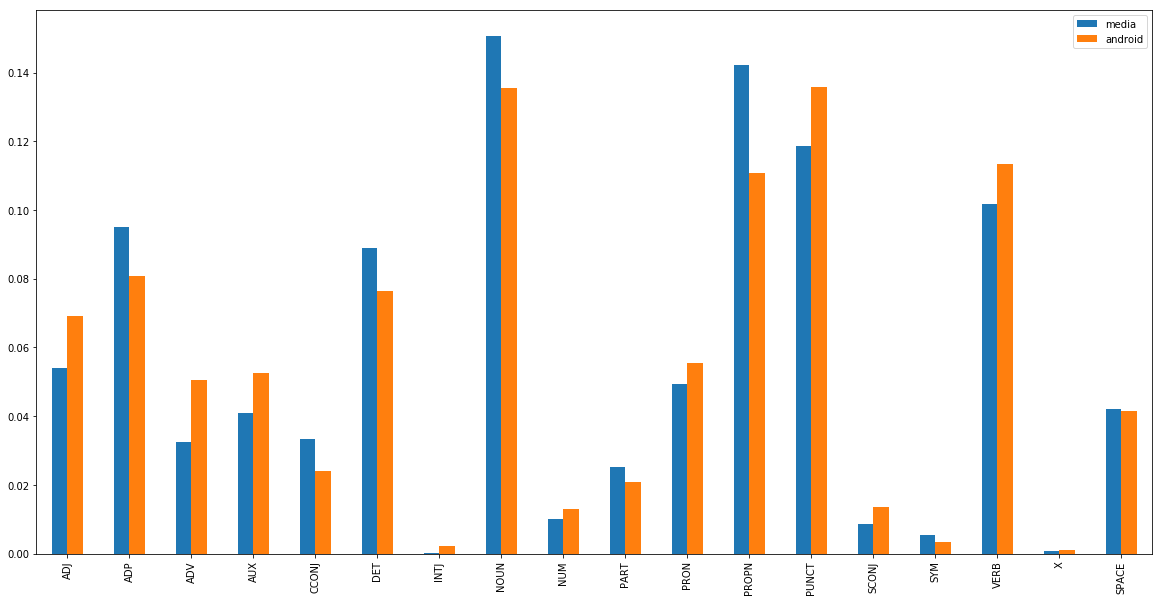

In [219]:
media_tweets = trump_doc = nlp('\n'.join(trump_tweets[trump_tweets.SOURCE=='Media Studio'].head(2000).text.values))
android_tweets = trump_doc = nlp('\n'.join(trump_tweets[trump_tweets.SOURCE=='Twitter for Android'].head(2000).text.values))

media_tweetsPOS = pd.Series(media_tweets.count_by(spacy.attrs.POS))/len(media_tweets)
android_tweetsPOS = pd.Series(android_tweets.count_by(spacy.attrs.POS))/len(android_tweets)

df = pd.DataFrame([media_tweetsPOS, android_tweetsPOS], index=['media', 'android'])
df.columns = [tagDict[column] for column in df.columns]
df.T.plot(kind='bar', figsize=(20, 10))

In [220]:
def verbObjects(doc, verb):
    verb_objects = list()
    for tok in doc:
        if tok.pos_.startswith('V') and tok.lemma_.lower()==verb:
            for child in tok.children:
                if child.dep_ in ['xcomp', 'dobj', 'ccomp']:
                    verb_objects.append(''.join(i.string for i in child.subtree).strip())
    return Counter(verb_objects).most_common(10)
        

In [221]:
verbObjects(android_tweets, 'make')

[('AMERICA GREAT', 67),
 ('America', 6),
 ('AMERICA SAFE AND', 5),
 ('AMERICA SAFE', 4),
 ('America Great', 3),
 ('so many mistakes', 3),
 ('AMERICA SAFE & GREAT', 2),
 ('Great', 2),
 ('a big speech', 2),
 ('kooky Cokie Roberts', 1)]

In [222]:
verbObjects(media_tweets, 'make')

[('AMERICA GREAT', 3),
 ("a fortune w/ O'Care", 1),
 ('an announcement on #TaxReform', 1),
 ('America', 1)]

In [226]:
def characterAdjectives(text, character):
    adjectives = []
    for word in text: 
        if character in word.string:
            for child in word.children: 
                if child.pos_ == 'ADJ': 
                    adjectives.append(child.string.strip())
    return Counter(adjectives).most_common(10)

In [227]:
characterAdjectives(android_tweets, 'Hillary')

[('Crooked', 18), ('worst', 1), ('-', 1)]

In [228]:
characterAdjectives(media_tweets, 'Hillary')

[]